>
> <center>
>
> # **Time Series Forecasting for Energy Consumption Patterns**
>
></center>
>



 

> - > This document analyzes energy consumption patterns over time, utilizing the Prophet forecasting model.
>
> - > By extracting relevant features and training the model, it forecasts future energy consumption and provides insights for efficient resource management.


># Importing necessary libraries
>- pandas is used for data analysis and manipulation
>>
>-  matplotlib is used for data visualization
>>
>- seaborn is also used for visualization but it has high level interface
>>
>- Scikit-learn,(sklearn) provides simple and efficient tools for data mining and data analysis,
>>
> - Prophet for time series forecasting,
>
>``````

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import prophet
from prophet import Prophet


># **load dataset**
   >     read_excel
   > - is a function in pandas used to load datasets like xlsx ,xls
   >
>
   >- This dataset(df_hour.xlsx) contains timestamps, energy consumption values, and additional attributes related to equipment, assets, errors, and companies.


In [218]:
df = pd.read_excel("df_hour.xlsx")

In [219]:
print(df)

      Unnamed: 0           Timestamp  Answer Value First  Answer Value Last  \
0              0 2024-01-01 00:00:00            54199.73           54199.79   
1              1 2024-01-01 01:00:00            54199.80           54199.91   
2              2 2024-01-01 02:00:00            54199.92           54200.03   
3              3 2024-01-01 03:00:00            54200.04           54200.16   
4              4 2024-01-01 04:00:00            54200.17           54200.29   
...          ...                 ...                 ...                ...   
1211        1211 2024-02-20 11:00:00            76463.02           76487.40   
1212        1212 2024-02-20 12:00:00            76490.87           76525.19   
1213        1213 2024-02-20 13:00:00            76542.59           76566.49   
1214        1214 2024-02-20 14:00:00            76569.48           76599.95   
1215        1215 2024-02-20 15:00:00            76610.69           76646.43   

      Energy Consumption (kWh)   Equipment SNO   As

>_________________
> # **Datetime**
    >-      to_datetime()
   >- >  is a function in pandas used to convert various types of input into datetimemobjects. 
   >>
   >- >This function can convert a string, timestamp, or datetime object into a pandas datetime object.
   >
  > - > It  extracts relevant features such as year, month, day, hour, minute, and second from the timestamp using pandas' datetime properties (`dt.year`, `dt.month`, `dt.day`, `dt.hour`, `dt.minute`, `dt.second`)
  >- > This function is essential for preprocessing time-series data in data analysis, machine learning, and forecasting projects.
  >___________

In [220]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

> ## Renaming 
 > -       rename()
  > - is a  function in pandas used to rename one or more columns in a DataFrame.
  >
> - It takes a dictionary as input, where the keys are the old column names and the values are the new column names to be assigned.
>
>> -      inplace =True
>> - >By setting the inplace parameter to True, the original DataFrame is modified, and the changes are applied directly.
>>     
>>>>

>># Note
 > >- >Prophet expects the input DataFrame to have these specific column names ('ds' for the timestamps and 'y' for the target variable)
 >>>
 >>- > because  it follows a standardized convention for time series data. 
 >>>>
 >>- > This format simplifies the implementation process and ensures compatibility with Prophet's forecasting algorithms.


In [275]:
# Rename columns to 'ds' and 'y'
df.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)
print(df)

      Unnamed: 0                  ds  Answer Value First  Answer Value Last  \
0              0 2024-01-01 00:00:00            54199.73           54199.79   
1              1 2024-01-01 01:00:00            54199.80           54199.91   
2              2 2024-01-01 02:00:00            54199.92           54200.03   
3              3 2024-01-01 03:00:00            54200.04           54200.16   
4              4 2024-01-01 04:00:00            54200.17           54200.29   
...          ...                 ...                 ...                ...   
1211        1211 2024-02-20 11:00:00            76463.02           76487.40   
1212        1212 2024-02-20 12:00:00            76490.87           76525.19   
1213        1213 2024-02-20 13:00:00            76542.59           76566.49   
1214        1214 2024-02-20 14:00:00            76569.48           76599.95   
1215        1215 2024-02-20 15:00:00            76610.69           76646.43   

          y   Equipment SNO   Asset Number     Read

> ## **Prophet**
>
> > - *Prophet is an open-source forecasting tool developed by Facebook that is designed to make time series forecasting tasks*
>>
 > > - *Prophet is built on a decomposable time series model that includes components for trend, seasonality, holidays, and additional regressors.* 
 >>
 >> -  *It provides intuitive parameters for controlling the forecasting process and offers automatic detection of changepoints and holidays.*
 >>
 > > -  *Overall, Prophet simplifies the process of time series forecasting while providing robust and interpretable results.*

>    >   ``from prophet import Prophet: ``
> - This imports the Prophet class from the Prophet library, allowing us to use its functionalities.
>
>  >     model = Prophet():
      > - This initializes a Prophet forecasting model with default parameters.
      >
> > Model Fitting:          ````model.fit(df):````
>
 >- This  fits the Prophet model to the input DataFrame df.
 >
 >-  The fit() method takes the DataFrame containing the time series data (df) as its input and trains the Prophet model on this data.


In [223]:
from prophet import Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)


12:18:27 - cmdstanpy - INFO - Chain [1] start processing
12:18:27 - cmdstanpy - INFO - Chain [1] done processing


> ## Forecasting(Future)
>
>-  >```df['ds'].max() ```
>
>> - This part of the code fetches the maximum timestamp from the 'ds' column of the DataFrame df. 
>>
> >- The 'ds' column typically represents the timestamps or dates in a time series dataset.
>> - It takes the maximum timestamp from the 'ds' column of the DataFrame df and adds one hour to it.
>>
>
>    - >     pd.Timedelta(hours=1)
>
         > > - represents a time duration of 1 hour. By adding this timedelta to p_index, we advance the index by 1 hour, positioning it to the next time interval.
>>
>> - This specifies a timedelta of 1 hour. It is employed to increment the current index by 1 hour, Making sure that the following missing values are separated by this amount of time.
>>
>>
>______________
>>
>  **pd.date_range(start=future_start_date, periods=24 * 30 * 2, freq='H')**
>
> - ```pd.date_range```  function is used to generate a sequence of dates or timestamps.
>
>- ``start=future_start_date:`` It sets the start date for the sequence, which is future_start_date.
>
>- ```periods=24*30*2: ```This  specifies the no. of periods (timestamps) to generate.
>
> - Here, 24 * 30 *2 means 24 hours per day, 30 days per month, and 2 months, resulting in a total of 1440 hours (24 hours/day * 30 days/month * 2 months).
>
>- ``freq='H':`` It sets the frequency of the timestamps to hourly ('H'), meaning each timestamp in the sequence represents an hour.
>________________
>>```pd.DataFrame({'ds': future}):```
>>- It creates a DataFrame with one column named 'ds', where 'ds' contains the sequence of future timestamps generated earlier.
>>
>> - The purpose of creating a DataFrame with the future timestamps is to prepare the input data required for forecasting future values using time series models like prophet

In [277]:
# Create a DataFrame for future predictions starting after the last timestamp in the dataset
future_start_date = df['ds'].max() + pd.Timedelta(hours=1)  # Start from the hour after the last timestamp
future = pd.date_range(start=future_start_date, periods=24*30*2, freq='H')  # Forecasting for the next two months
future = pd.DataFrame({'ds': future})


In [225]:
print(future_start_date)

2024-02-20 16:00:00


In [226]:
print(future)


                      ds
0    2024-02-20 16:00:00
1    2024-02-20 17:00:00
2    2024-02-20 18:00:00
3    2024-02-20 19:00:00
4    2024-02-20 20:00:00
...                  ...
1435 2024-04-20 11:00:00
1436 2024-04-20 12:00:00
1437 2024-04-20 13:00:00
1438 2024-04-20 14:00:00
1439 2024-04-20 15:00:00

[1440 rows x 1 columns]


In [227]:

# Forecast future values
forecast = model.predict(future)


In [228]:
print(forecast)

                      ds      trend  yhat_lower  yhat_upper  trend_lower  \
0    2024-02-20 16:00:00  17.204385   22.105789   40.612997    17.204385   
1    2024-02-20 17:00:00  17.206115   22.281977   41.199388    17.206115   
2    2024-02-20 18:00:00  17.207845   21.455454   40.047407    17.207845   
3    2024-02-20 19:00:00  17.209576   19.290746   37.392948    17.209576   
4    2024-02-20 20:00:00  17.211306   16.359384   34.348100    17.211306   
...                  ...        ...         ...         ...          ...   
1435 2024-04-20 11:00:00  19.687529    7.962327   25.967403    18.379357   
1436 2024-04-20 12:00:00  19.689259    9.793258   27.966716    18.380119   
1437 2024-04-20 13:00:00  19.690989   11.249745   30.030832    18.380555   
1438 2024-04-20 14:00:00  19.692720   12.077725   30.549383    18.380477   
1439 2024-04-20 15:00:00  19.694450   13.793297   31.761403    18.380398   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     

> ## Forecasting(Historical)
> This is to create  a DataFrame for future predictions using the ```pd.date_range``` function.
>
>-  >```df['ds'].min() ```
>
>> - This part of the code fetches the minimum timestamp from the 'ds' column of the DataFrame df. 
>>
> >- The 'ds' column typically represents the timestamps or dates in a time series dataset.
>> - It takes the minimum timestamp from the 'ds' column of the DataFrame df .
>>
>
>    - >     pd.Timedelta(hours=1)
>
         > > - represents a time duration of 1 hour. By adding this timedelta to p_index, we advance the index by 1 hour, positioning it to the next time interval.
>>
>> - This specifies a timedelta of 1 hour. It is employed to increment the current index by 1 hour, Making sure that the following missing values are separated by this amount of time.
___________
>>
>  **pd.date_range(end=past_end_date, periods=24 * 30 * 2, freq='H')**
>
> - ```pd.date_range```  function is used to generate a sequence of dates or timestamps.
>
>- ``end=past_end_date:`` It sets the end date for the sequence, which is past_end_date.
>
>- ```periods=24*30*2: ```This  specifies the no. of periods (timestamps) to generate.
>
> - Here, 24 * 30 *2 means 24 hours per day, 30 days per month, and 2 months, resulting in a total of 1440 hours (24 hours/day * 30 days/month * 2 months).
>
>- ``freq='H':`` It sets the frequency of the timestamps to hourly ('H'), meaning each timestamp in the sequence represents an hour.
>________________
>>```pd.DataFrame({'ds': past}):```
>>- It creates a DataFrame with one column named 'ds', where 'ds' contains the sequence of Past timestamps generated earlier.
>>
>> - The purpose of creating a DataFrame with the Past timestamps is to prepare the input data required for forecasting Past values using time series models like prophet

In [229]:
# Create a DataFrame for past predictions starting before the first timestamp in the dataset
past_end_date = df['ds'].min() - pd.Timedelta(hours=1)  # End at the hour before the first timestamp
past = pd.date_range(end=past_end_date, periods=24*30*2, freq='H')  # Forecasting for the past two months
past = pd.DataFrame({'ds': past})

# Forecast past values
past_forecast = model.predict(past)


In [230]:
print(past_end_date)

2023-12-31 23:00:00


In [231]:
print(past)

                      ds
0    2023-11-02 00:00:00
1    2023-11-02 01:00:00
2    2023-11-02 02:00:00
3    2023-11-02 03:00:00
4    2023-11-02 04:00:00
...                  ...
1435 2023-12-31 19:00:00
1436 2023-12-31 20:00:00
1437 2023-12-31 21:00:00
1438 2023-12-31 22:00:00
1439 2023-12-31 23:00:00

[1440 rows x 1 columns]


In [232]:
print(past_forecast)

                      ds      trend  yhat_lower  yhat_upper  trend_lower  \
0    2023-11-02 00:00:00   6.252580    1.732747   20.723009     6.252580   
1    2023-11-02 01:00:00   6.257201    0.888976   18.927006     6.257201   
2    2023-11-02 02:00:00   6.261822   -1.505429   16.566431     6.261822   
3    2023-11-02 03:00:00   6.266444   -4.322462   13.975143     6.266444   
4    2023-11-02 04:00:00   6.271065   -7.681653   11.560408     6.271065   
...                  ...        ...         ...         ...          ...   
1435 2023-12-31 19:00:00  12.883746   -1.354717   17.205603    12.883746   
1436 2023-12-31 20:00:00  12.888367   -3.741149   14.299857    12.888367   
1437 2023-12-31 21:00:00  12.892988   -4.640514   12.385831    12.892988   
1438 2023-12-31 22:00:00  12.897609   -4.916181   14.096320    12.897609   
1439 2023-12-31 23:00:00  12.902230   -3.497893   15.056292    12.902230   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     

>
>## distribution Plot
> - This plot visualizes the distribution of original and forecasted data over time.
>
>>-  The original data, depicted in ``orange``, represents the actual energy consumption values.
>>
>> -  The ``green`` line illustrates the forecasted data for future time points, while the ``teal`` line showcases the forecasted historical data for past time points.


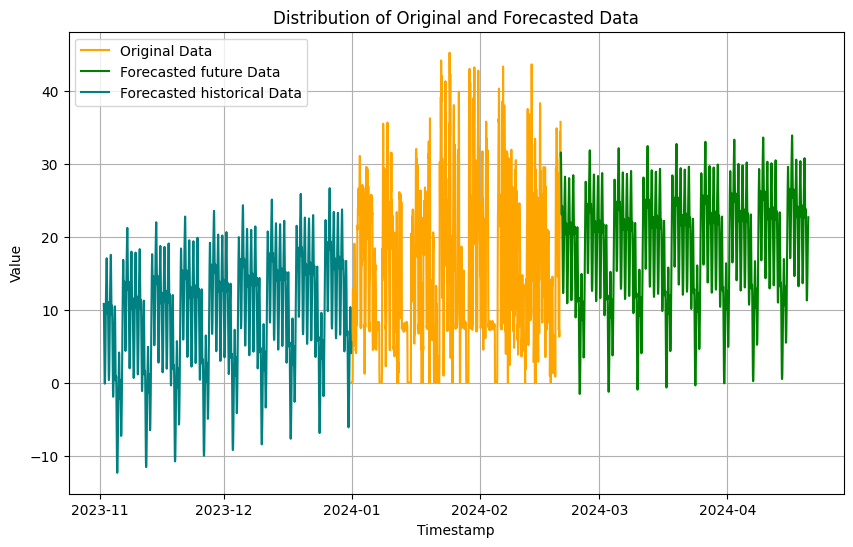

In [280]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Data', color='orange', linestyle='-')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted future Data', color='green')
plt.plot(past_forecast['ds'], past_forecast['yhat'], label='Forecasted historical Data', color='teal')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Distribution of Original and Forecasted Data')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Merging the data
 >- The aim is to merge the past forecast and future forecast with the original DataFrame.
  >
 >- It ensures consistency by renaming the 'yhat' column to 'y' in both the past and future forecasts.
 >
 >- The purpose of merging is to combine the actual energy consumption data from the original DataFrame with the forecasted values from both the past and future predictions.
 >
 >-  This consolidated DataFrame, final_df, contains the timestamps ('ds') and corresponding energy consumption values ('y') for both historical and forecasted data points, sorted by timestamp.



In [213]:
# Merge past forecast with original DataFrame, rename 'yhat' to 'y' for consistency
past_forecast.rename(columns={'yhat': 'y'}, inplace=True)
forecast.rename(columns={'yhat': 'y'}, inplace=True)

final_df = pd.concat([df[['ds', 'y']], past_forecast[['ds', 'y']], forecast[['ds', 'y']]])

# Sort the merged DataFrame by 'ds'
final_df = final_df.sort_values(by='ds').reset_index(drop=True)


# exporting 
>         to_excel()
 >>is. afunction used for exporting data to an excel fiel

In [138]:
# Export to Excel
final_df.to_excel("final_forecast.xlsx", index=False)
